In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import query_table
from lib.visualizer import hourly_profile_heatmap
import seaborn as sns
import plotly.express as px

In [2]:
df_1T = query_table(table='soldering_oven')

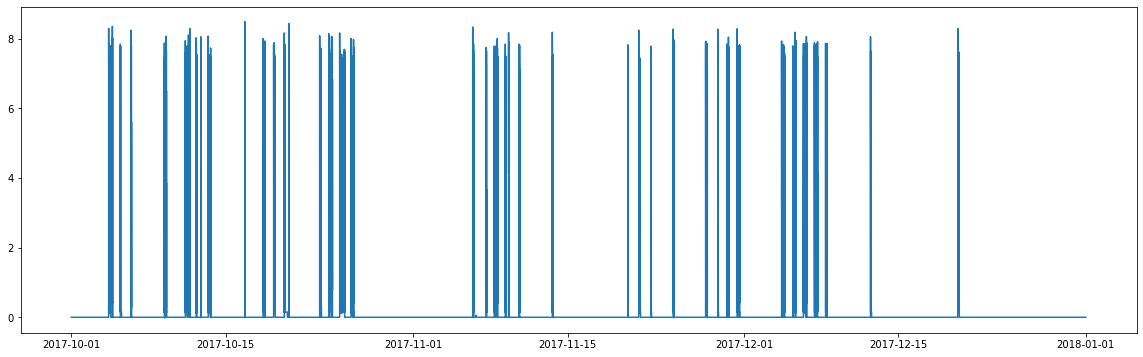

In [3]:
plt.figure(figsize=(20, 6))
plt.plot(df_1T.index, df_1T.kw)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(x=df_1T.kw, bins=30)
plt.show()

In [4]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)

In [5]:
# Add time features
df_1T['day_week'] = df_1T.index.dayofweek
df_1T['day_name'] = df_1T.index.day_name().values
df_1T['day_name'] = df_1T['day_name'].astype(cat_type)
df_1T['month'] = df_1T.index.month
df_1T['week'] = df_1T.index.isocalendar().week 
df_1T['hour'] = df_1T.index.hour
df_1T['day'] = df_1T.index.day
df_1T['minute'] = df_1T.index.minute
#df_1T['second'] = df_1T.index.second

In [6]:
dayweek_hour_avg = df_1T.groupby(['day_name', 'hour'])['kw'].mean().unstack()

In [63]:
dayweek_hour_avg.sort_values(['day_name'], )

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_name,,,,,,,,,,,,,,,,,,,,,
Monday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.224873,...,0.457226,0.468983,0.182005,0.163959,0.000000,0.0,0.0,0.0,0.0,0.0
Tuesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.147423,0.087724,...,0.402641,0.336568,0.183395,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Wednesday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.539199,0.988082,...,0.560058,0.318058,0.204762,0.323982,0.092026,0.0,0.0,0.0,0.0,0.0
Thursday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099024,0.532969,0.659901,...,0.251645,0.261304,0.136142,0.029969,0.154211,0.0,0.0,0.0,0.0,0.0
Friday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135171,0.090271,0.286097,...,0.283217,0.195490,0.042355,0.148713,0.056519,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
Sunday,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


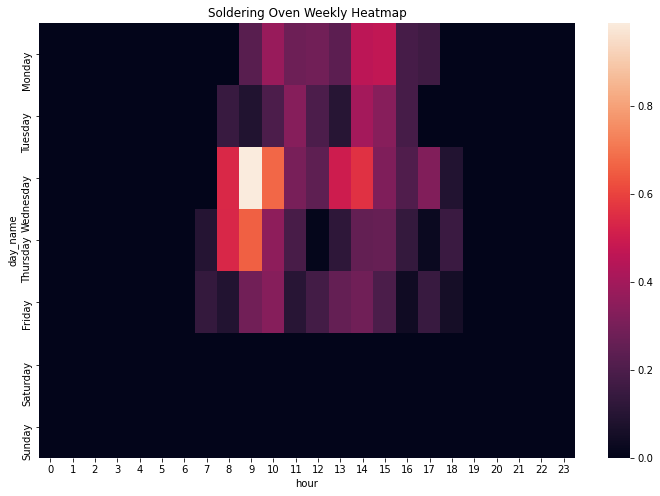

In [64]:
plt.figure(figsize=(12, 8))
sns.heatmap(dayweek_hour_avg)
plt.title('Soldering Oven Weekly Heatmap')
plt.show()

In [2]:
hourly_profile_heatmap()

DatabaseError: Execution failed on sql '
        select
            *
        from
            hipe.entsorgung t
        ': relation "hipe.entsorgung" does not exist
LINE 5:             hipe.entsorgung t
                    ^
